In [1]:
import numpy as np
from scipy . interpolate import interp1d , interp2d
import matplotlib . pyplot as plt

In [2]:
##initialising values
inf = 100000
T_max = 50
beta = 0.99


In [3]:
total_r_grid = np.arange (0 ,10001 , step =100)
indv_r_grid = np.arange (100 , 1201 , step =100)
grid = np.meshgrid (total_r_grid , indv_r_grid)

In [4]:
##defining a maximizing expected winning function
def maximize(total_r,indv_r, r_func, V, beta):
    v_func = interp2d (total_r_grid , indv_r_grid , V , fill_value = None)
    
    ##quiting value condition
    q_quit = total_r - total_r *(indv_r ==1200)
    
    
    V_next = np.zeros((12,))
    
    for i , g in enumerate (np.arange (100,1201,step =100)):
        V_next[i] = v_func(total_r + g , g)
    
    ##continuing value condition
    q_continue = beta * 1/12* np.sum(V_next) - inf*(indv_r ==1200)
    
    ##return value at t period, choice at t period(either to continue or not)
    return np.max([q_continue , q_quit]),np.argmax([q_continue , q_quit])


In [5]:
#defining the bellman function 
def bellman (r_func , V) :
    V_new = np.zeros_like(V)
    choice = np.zeros_like(V)
    for i , total_r in enumerate (total_r_grid) :
        for j , indv_r in enumerate (indv_r_grid) :
            v_max , a_star = maximize(total_r, indv_r, r_func, V, beta)
            if indv_r != 1200:
                V_new [j,i] = v_max
                choice [j,i] = a_star
            else: pass
    return V_new , choice

In [6]:
r_func = lambda total_r , indv_r : indv_r *( indv_r !=1200)

V = r_func(grid[0] , grid[1])

V_history = [V]
choice_history = []
loss_history = []
for i in range ( T_max ) :
    V , Choice = bellman (r_func, V)
    loss = np.abs(V - V_history[-1]).max ()
    V_history.append(V)
    choice_history.append(Choice)
    loss_history.append(loss)
    if loss ==0:
        break


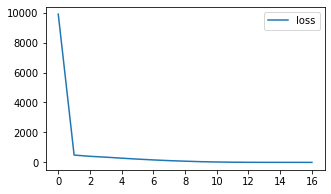

In [7]:
fig, ax1 = plt.subplots(figsize=(5, 3))
ax1.plot(loss_history,label="loss")
ax1.legend()

In [8]:
index = np.where(choice_history[-1][0]==1)[0][0]
print(choice_history[-1][0][index-1], "- continuing :",total_r_grid[index-1],"\n",choice_history[-1][0][index],"- quitting at",total_r_grid[index])


0 - continuing : 5800 
 1 - quitting at 5900


The above values shows the when the person quits with the optimal policy